<a href="https://colab.research.google.com/github/Nekoiii/SD_Practices_colab/blob/main/img2img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://huggingface.co/docs/diffusers/using-diffusers/img2img

In [1]:
%%capture
!pip install diffusers transformers ftfy accelerate

In [2]:
import torch
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained("nitrosocke/Ghibli-Diffusion", torch_dtype=torch.float16).to(
    device
)

unet/diffusion_pytorch_model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


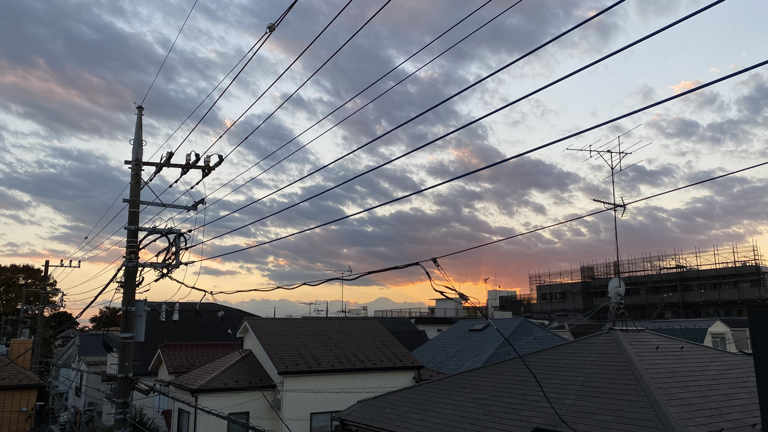

In [3]:
#file_path = "/content/drive/MyDrive/datasets/frames/Hokkaido/frame-182.png"
file_path = '/content/drive/MyDrive/datasets/imgs/others/cloud-1.jpg'

init_image = Image.open(file_path).convert("RGB")
init_image.thumbnail((768, 768))
init_image

  0%|          | 0/37 [00:00<?, ?it/s]

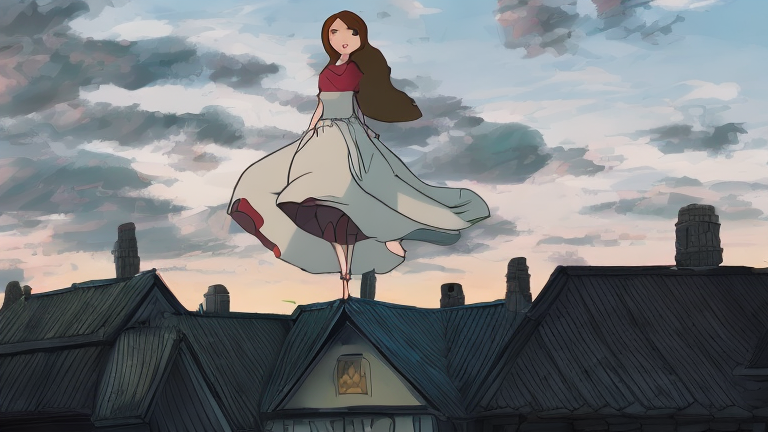

In [21]:
prompt = "best quality, masterpiece,a girl,animation,roofs"
generator = torch.Generator(device=device).manual_seed(1000)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5, generator=generator).images[0]
image

  0%|          | 0/37 [00:00<?, ?it/s]

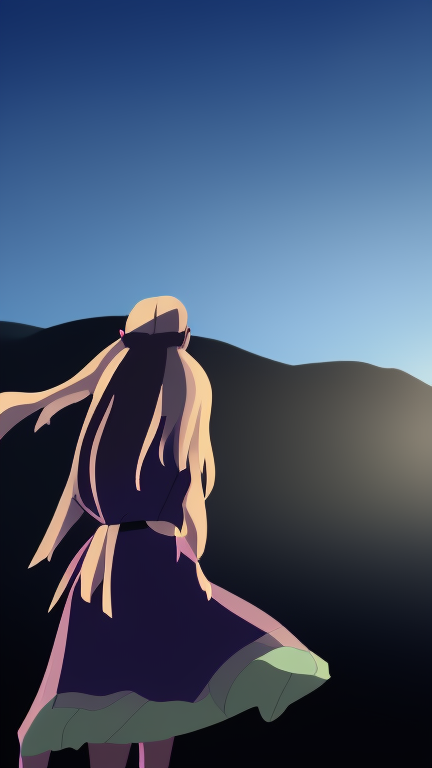

In [7]:
from diffusers import LMSDiscreteScheduler

lms = LMSDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.scheduler = lms
generator = torch.Generator(device=device).manual_seed(1024)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5, generator=generator).images[0]
image